# Rocket Candy

Simulation of model rocket candy stabilization during flight. Rocket candy solid booster is based on mixed sugar with potassium nitrate $KNO_3$.

The self-stabilisation is done via solid booster mounted on the top of the rocket so the moment from gravitational force applied to the center of the mass stabilises the rocket during flight.

<img src="rocketcandy.png">

<hr>

$x: ma_x=F\cos(\phi)$

$y: ma_y=F\sin(\phi)-mg$

$z_A: I_A\alpha=mg\frac{l}{2}\cos(\phi)$

<hr>

$a_x = \frac{F}{m}\cos(\phi)$

$a_y=\frac{F}{m}\sin(\phi)-g$

$\alpha=\frac{m}{I_A}g\frac{l}{2}\cos(\phi)$

Where:

$m$ - mass of the rocket [$kg$]

$F$ - Force applied at the top of the rocket [$N$]

$g$ - gravitation acceleration $9.81m.s^{-2}$

$I_A$ - moment of inertia referenced to the point $A$ equal $\frac{1}{3}ml^2$

$\phi$ - angle relative to the horizontal axis $x$ [$rad$]

$l$ - length of the rocket [$m$]

$a_x, a_y$ - acceleration in $x$ and $y$ axis [$m.s^{-2}$]

$\alpha$ - angular acceleration [$rad.s^{-2}$]





# Force in time

The force based on time is modelled using simple sinus function with maximum force applied in the middle of given interval. The maximal value is adequate to measurement performed on real Rocked Candy solid booster.

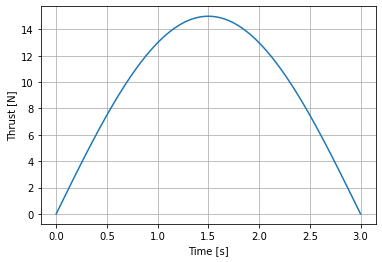

In [1]:
import numpy as np
import pylab as plt

F = 15                      # N
g = 9.81                    # ms-2
m = 0.05                    # kg
l = 1.0                     # m
I_A = (1/3.0) * m * l**2    # kg.m2
dt = 0.01                   # s
N = 300                     # - simulation steps

time = np.linspace(0, 3, N)
x = np.linspace(0, np.pi, N)
thrust = np.sin(x) * F

plt.plot(time, thrust)
plt.xlabel('Time [s]')
plt.ylabel('Thrust [N]')
plt.grid()
plt.show()



# Flight simulation

Numeric integration using Runge-Kutta first order (Euler's) method to calculate the kinematic values of the rocket during flight.

The initial values are set to zero (the rocket launches from steady state) except the initial angle, to model the self stabilisation process via the eccentricity of the gravitational force.

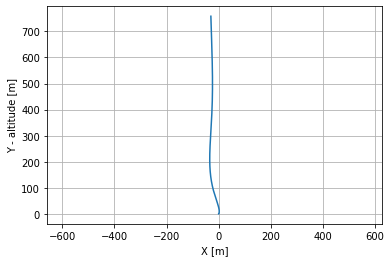

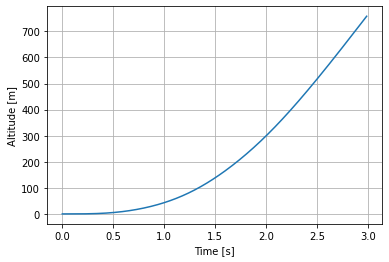

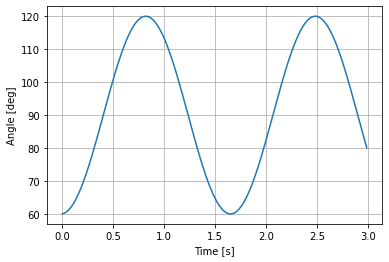

In [2]:
log_x, log_y, log_phi, log_time = [], [], [], []

vx, vy, omega = 0, 0, 0
x, y, phi = 0, 0, np.radians(60)

for i in range(N):
    ax = np.cos(phi) * thrust[i] / m
    ay = np.sin(phi) * thrust[i] / m - g
    alpha = g * (l/2.0) * np.cos(phi) * m / I_A

    vx = vx + ax * dt
    vy = vy + ay * dt
    omega = omega + alpha * dt

    x = x + vx * dt
    y = y + vy * dt
    phi = phi + omega * dt

    log_x.append(x)
    log_y.append(y)
    log_phi.append(np.degrees(phi))
    log_time.append(i*dt)

plt.plot(log_x, log_y)
plt.axis('equal')
plt.xlabel('X [m]')
plt.ylabel('Y - altitude [m]')
plt.grid()
plt.figure()
plt.plot(log_time, log_y)
plt.xlabel('Time [s]')
plt.ylabel('Altitude [m]')
plt.grid()
plt.figure()
plt.plot(log_time, log_phi)
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.grid()
plt.show()
